In [1]:
import numpy as np
import pandas as pd
import subprocess
import sys
from numba import njit
import matplotlib.pyplot as plt
import os
import glob
import scri
import h5py
plt.style.use('seaborn-talk')
plt.rcParams["figure.figsize"] = (12,10)
import json
import time
import pickle
from pathlib import Path
spec_home="/home/himanshu/spec/my_spec"

In [2]:
data_path = Path("/panfs/ds09/sxs/himanshu/gauge_stuff/gauge_driver_runs/runs/70_ngd_master_mr1_200_400/cce/Lev3_R0300/CharacteristicExtractUnusedReduction.h5")

In [23]:
with h5py.File(data_path,'r') as hf:
    hf.visit(print)
    data = hf['Cce/Psi4.dat'][:]
    print(list(data.shape))

Cce
Cce/EthInertialRetardedTime.dat
Cce/News.dat
Cce/Psi0.dat
Cce/Psi1.dat
Cce/Psi2.dat
Cce/Psi3.dat
Cce/Psi4.dat
Cce/Strain.dat
src.tar.gz
[29865, 163]


In [24]:

sum = 1
col_list = ['time']
for l in range(10):
    for m in np.arange(-l, l + 1):
        col_list.append(f"R,{l},{m}")
        col_list.append(f"I,{l},{m}")
        sum += 2
    # print(l+1,sum)

pddata = pd.DataFrame(data)
pddata.columns = col_list[:data.shape[1]]

<AxesSubplot:xlabel='time'>

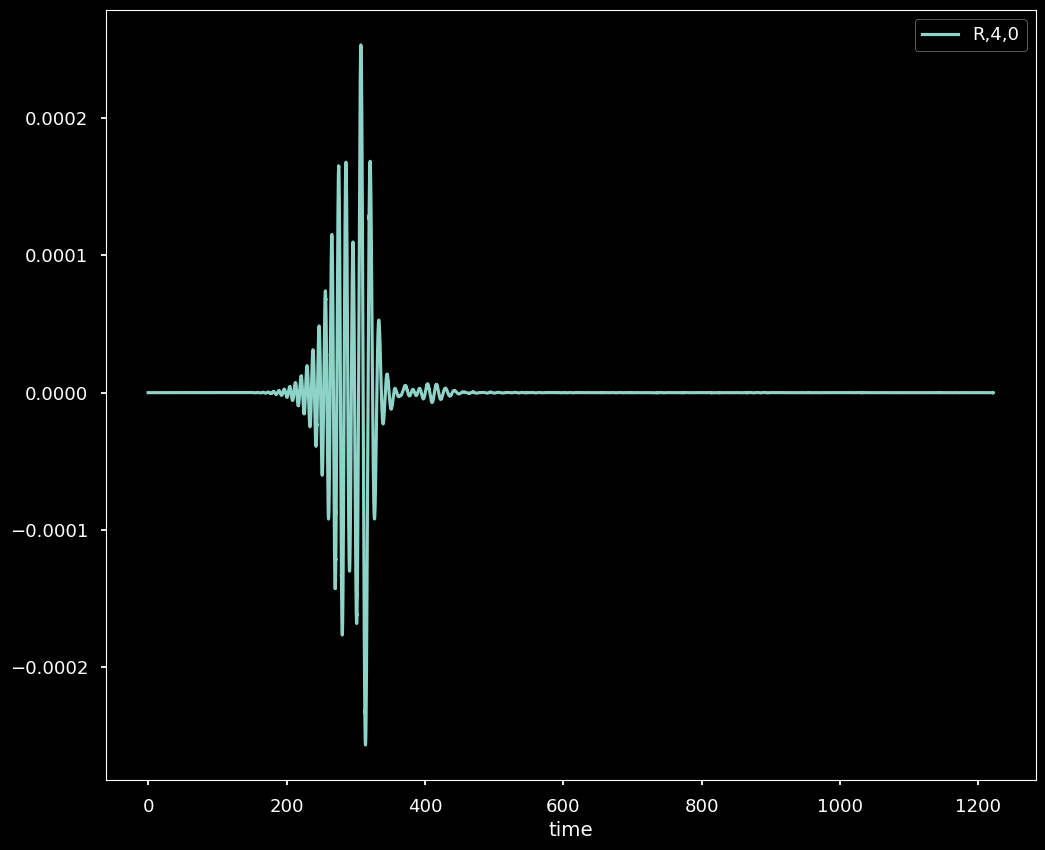

In [29]:
pddata.plot(x="time",y='R,4,0')

In [ ]:
scri.SpEC.file_io.create_abd_from_h5('CCE',h="/panfs/ds09/sxs/himanshu/gauge_stuff/gauge_driver_runs/runs/70_ngd_master_mr1_200_400/cce/Lev3_R0300/CharacteristicExtractUnusedReduction.h5/Cce/Strain.dat")

In [ ]:
abd = scri.SpEC.create_abd_from_h5(
    "SXS",
    h    = "/path/to/rhOverM_file.h5",
    Psi4 = "/path/to/rMPsi4_file.h5",
    Psi3 = "/path/to/r2Psi3_file.h5",
    Psi2 = "/path/to/r3Psi2OverM_file.h5",
    Psi1 = "/path/to/r4Psi1OverM2_file.h5",
    Psi0 = "/path/to/r5Psi0OverM3_file.h5",
)


In [5]:
save_path = Path("/panfs/ds09/sxs/himanshu/scripts/scri_stuff/_del")

In [14]:
test_path = Path("/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev2")

In [15]:
path_list = list(test_path.glob("*.h5"))
path_list

[PosixPath('/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev2/Horizons.h5'),
 PosixPath('/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev2/HorizonsDump.h5'),
 PosixPath('/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev2/rMPsi4_Asymptotic_GeometricUnits.h5'),
 PosixPath('/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev2/rMPsi4_Asymptotic_GeometricUnits_CoM.h5'),
 PosixPath('/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev2/rPsi4_FiniteRadii_CodeUnits.h5'),
 PosixPath('/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev2/rhOverM_Asymptotic_GeometricUnits.h5'),
 PosixPath('/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev

In [16]:
with h5py.File(path_list[2],'r') as hf:
    hf.visit(print)

FileNotFoundError: [Errno 2] Unable to open file (unable to open file: name = '/panfs/ds09/sxs/kmitman/Annexes/SimAnnex/Public/CSUF14/BBH_CFMS_d30_q1_sA_0_0_-0.438_sB_0_0_-0.438/Lev2/rMPsi4_Asymptotic_GeometricUnits.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)